# Unsupervised Clustering Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Processing

In [3]:
songs = pd.read_csv("data/cleaned_songs.csv").drop("Unnamed: 0", axis=1)
songs

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170617,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170618,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170619,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170620,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [4]:
numerical = ["acousticness", "danceability", "energy", "key", "instrumentalness", "mode", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity"]
data = songs[numerical].to_numpy()
data

array([[9.82000e-01, 2.79000e-01, 2.11000e-01, ..., 8.09540e+01,
        5.94000e-02, 4.00000e+00],
       [7.32000e-01, 8.19000e-01, 3.41000e-01, ..., 6.09360e+01,
        9.63000e-01, 5.00000e+00],
       [9.61000e-01, 3.28000e-01, 1.66000e-01, ..., 1.10339e+02,
        3.94000e-02, 5.00000e+00],
       ...,
       [1.01000e-01, 6.34000e-01, 8.58000e-01, ..., 9.16880e+01,
        6.37000e-01, 7.60000e+01],
       [9.98000e-03, 6.71000e-01, 6.23000e-01, ..., 7.50550e+01,
        1.95000e-01, 7.00000e+01],
       [1.32000e-01, 8.56000e-01, 7.21000e-01, ..., 9.49910e+01,
        6.42000e-01, 7.40000e+01]])

In [7]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [8]:
kf = KFold(n_splits=10, random_state=13, shuffle=True)
kf.get_n_splits(data)

10

# Run KMeans Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
train_scores = np.zeros(20)
val_scores = np.zeros(20)

In [30]:
for i in range(1, 21):
    train_iter_scores = []
    val_iter_scores = []

    for train_idx, test_idx in kf.split(data):
        train, val = data[train_idx], data[test_idx]
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train)
        X_val = scaler.transform(val)

        model = KMeans(n_clusters=i)
        model.fit(X_train)
        train_iter_scores.append(model.score(X_train))
        val_iter_scores.append(model.score(X_val))
    
    train_scores[i-1] = np.mean(train_iter_scores)
    val_scores[i-1] = np.mean(val_iter_scores)

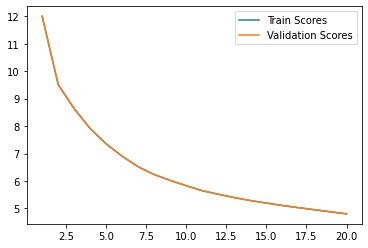

In [32]:
plt.plot(range(1, 21), -train_scores/(0.9*data.shape[0]), label="Train Scores")
plt.plot(range(1, 21), -val_scores/(0.1*data.shape[0]), label="Validation Scores")
plt.legend()
plt.show()

The slow-down happens near k=7.

In [33]:
best_model = KMeans(n_clusters=7)
best_model.fit_predict(data)

array([2, 2, 1, ..., 4, 4, 4], dtype=int32)

# Run DBSCAN

In [5]:
from sklearn.cluster import DBSCAN

In [17]:
cluster_size = []
unassigned = []

In [18]:
for i in range(0, 50):
    train_iter_scores = []
    val_iter_scores = []
    epss = np.linspace(0.1, 1.9, 50)

    scaler = StandardScaler()
    X = scaler.fit_transform(data)

    model = DBSCAN(eps=epss[i], min_samples=20)
    pred_clusters = model.fit_predict(X)

    cluster_sizes = np.unique(pred_clusters, return_counts=True)

    cluster_size.append(np.median(cluster_sizes[1][cluster_sizes[0] > -1]))
    unassigned.append(cluster_sizes[1][cluster_sizes[0] == -1])


/Users/chen/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chen/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chen/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chen/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chen/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chen/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

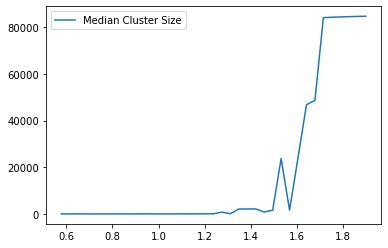

In [21]:
plt.plot(np.linspace(0.1, 1.9, 50), cluster_size, label="Median Cluster Size")
plt.legend()
plt.show()

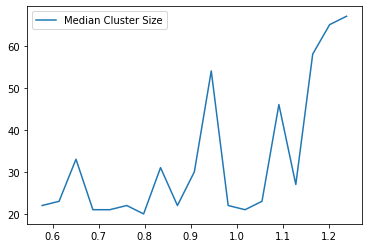

In [33]:
plt.plot(np.linspace(0.1, 1.9, 50)[:32], cluster_size[:32], label="Median Cluster Size")
plt.legend()
plt.show()

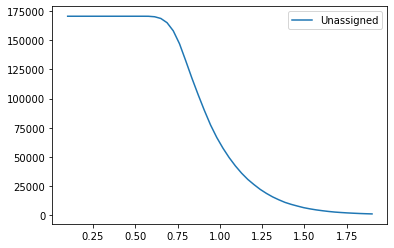

In [22]:
plt.plot(np.linspace(0.1, 1.9, 50), unassigned, label="Unassigned")
plt.legend()
plt.show()

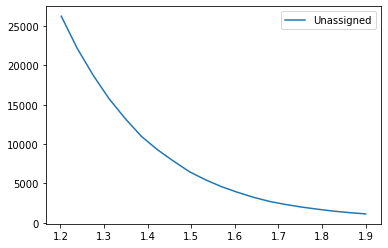

In [28]:
plt.plot(np.linspace(0.1, 1.9, 50)[30:], unassigned[30:], label="Unassigned")
plt.legend()
plt.show()

In [34]:
np.linspace(0.1, 1.9, 50)[31]

1.2387755102040816

Best value balancing cluster size and number of items unassigned is eps = 1.2388.

# Run Distribution-Based Clustering

In [23]:
from sklearn.mixture import GaussianMixture

In [29]:
train_scores = np.zeros(20)
val_scores = np.zeros(20)

In [30]:
for i in range(1, 21):
    train_iter_scores = []
    val_iter_scores = []

    for train_idx, test_idx in kf.split(data):
        train, val = data[train_idx], data[test_idx]
        
        X_train = train
        X_val = val

        model = GaussianMixture(n_components=i)
        model.fit(X_train)
        train_iter_scores.append(model.score(X_train))
        val_iter_scores.append(model.score(X_val))
    
    train_scores[i-1] = np.mean(train_iter_scores)
    val_scores[i-1] = np.mean(val_iter_scores)

/Users/chen/miniforge3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/chen/miniforge3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/chen/miniforge3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/chen/miniforge3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/chen/miniforge3/lib/python3.9/sit

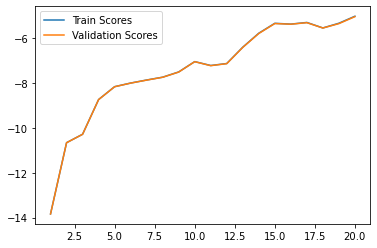

In [31]:
plt.plot(range(1, 21), train_scores, label="Train Scores")
plt.plot(range(1, 21), val_scores, label="Validation Scores")
plt.legend()
plt.show()

Best value for number of components is 12.

# DBSCAN Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_distances

In [36]:
dist_matrix = cosine_distances(data)